In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import imblearn

DATA SURVEY

In [2]:
survey = pd.read_csv(os.path.join( 'Resources', 'Cleaned_Survey.csv'))
survey.head()

,ID,age,Num_kids,Education,pre_employment_Status,partnered,mat_leave,mat_leave_eligability,CCS_eligability,help,returned
0,6,36,2,Tertiary education ( University or TAFE or equ...,Full time work,"Partner ( Husband/Wife, De-facto partner)",No,Yes- with some paid leave provided by Employer,No,Yes- As needed help,Yes
1,10,33,1,Tertiary education ( University or TAFE or equ...,Full time work,Single,No,Yes- with some paid leave provided by Employer,Yes,Yes - Scheduled help,Yes
2,11,32,1,Tertiary education ( University or TAFE or equ...,Part time work,"Partner ( Husband/Wife, De-facto partner)",No,No,No,No,No
3,13,38,3,Tertiary education ( University or TAFE or equ...,Full time work,Single,No,No,Yes,Yes- As needed help,Yes
4,14,54,2,Tertiary education ( University or TAFE or equ...,Full time work,Single,No,Yes- with some paid leave provided by Employer,No,No,No


In [3]:
survey.columns

Index(['ID', 'age', 'Num_kids', 'Education', 'pre_employment_Status',
       'partnered', 'mat_leave', 'mat_leave_eligability', 'CCS_eligability',
       'help', 'returned'],
      dtype='object')

In [21]:
# Assign X (data) and y (target)

X = survey[["age", "Num_kids", "Education", "pre_employment_Status", "partnered", "mat_leave_eligability", "CCS_eligability", "help"]]
y = survey["returned"].values.reshape(-1, 1)
y_collection = survey["returned"].values
print(X.shape, y.shape)



(93, 8) (93, 1)


In [30]:

X = pd.get_dummies(X)

X



,age,Num_kids,Education_High School diploma,Education_Master's or Doctorate,Education_None,Education_Tertiary education ( University or TAFE or equivalent),pre_employment_Status_Casual work,pre_employment_Status_Full time work,pre_employment_Status_Part time work,pre_employment_Status_Unemployed,"partnered_Partner ( Husband/Wife, De-facto partner)",partnered_Single,mat_leave_eligability_No,mat_leave_eligability_Yes - Unpaid (excludes govt Maternity pay),mat_leave_eligability_Yes- with some paid leave provided by Employer,CCS_eligability_No,CCS_eligability_Yes,help_No,help_Yes - Scheduled help,help_Yes- As needed help
0,36,2,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1
1,33,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0
2,32,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0
3,38,3,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1
4,54,2,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,54,4,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1
89,30,2,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1
90,42,2,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1
91,58,3,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0


In [22]:
# counting yes and no of returning to work

from collections import Counter
counter = Counter(y_collection)
print(counter)

Counter({'Yes': 80, 'No': 13})


<BarContainer object of 2 artists>

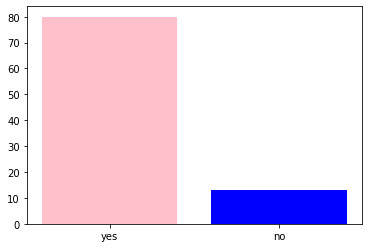

In [27]:
bar_y = [80, 13]
colour = ["pink", "blue"]
bar_x= ["yes", "no"]
plt.bar(bar_x, bar_y, color=colour)

In [31]:
#SMOTEME
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [32]:
counter = Counter(y)
print(counter)

Counter({'Yes': 80, 'No': 80})


<BarContainer object of 2 artists>

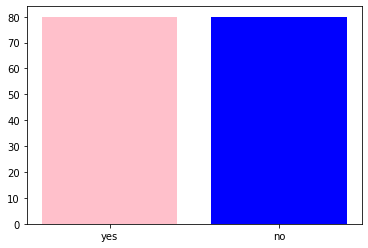

In [34]:
bar_y = [80, 80]
colour = ["pink", "blue"]
bar_x= ["yes", "no"]
plt.bar(bar_x, bar_y, color=colour)

Split our data into training and testing

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

Create a Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

Fit (train) or model using the training data

In [37]:
classifier.fit(X_train, y_train)

LogisticRegression()

Validate the model using the test data

In [38]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9333333333333333
Testing Data Score: 0.8


Make predictions

In [39]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No']
First 10 Actual labels: ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No']
